# Assignment 6
### Do Question 6, and three more questions of your choice.

### 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What are the outcomes for rolling a fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.

1) Rolling a fair three-sided die

Sample Space (Outcomes):
S = {1, 2, 3}

Set of All Events (all subsets of S):
E = { ∅, {1}, {2}, {3}, {1,2}, {1,3}, {2,3}, {1,2,3} }

Number of events: 2^3 = 8

Probabilities:
Each single outcome: P({i}) = 1/3
For any event A: P(A) = (number of outcomes in A) / 3

2) Flipping a fair coin twice

Sample Space:
S = {HH, HT, TH, TT}

Number of outcomes: 4
Number of events: 2^4 = 16

Probabilities:
Each outcome has probability: 1/4

3) Rolling the three-sided die twice and adding the results

Possible Sums:
S = {2, 3, 4, 5, 6}

Number of possible outcomes (sums): 5
Number of events: 2^5 = 32

Probabilities (not equally likely):

Sum	        # of ways to occur	        Probability
2	            1	                        1/9
3	            2	                        2/9
4	            3	                        3/9
5	            2	                        2/9
6	            1	                        1/9


### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

Rolling a fair single six-sided die
Sample space: {1, 2, 3, 4, 5, 6}
Number of outcomes: 6
Probability of each outcome: 1/6
Event space: the power set of the sample space (2^6 = 64 events).
Examples of events:

∅ (empty event)
{1}, {2}, {3}
{1, 2}, {2, 4, 5}, etc.
{1, 2, 3, 4, 5, 6} (the entire sample space)
Random variable: square root of the number of pips We define a random variable X such that:
If the outcome is k, then X = sqrt(k).
Example values: sqrt(1) = 1, sqrt(2) ≈ 1.41, … sqrt(6) ≈ 2.45.
We can simulate 5000 rolls of the die, record X, and plot its mass function and ECDF to visualize the distribution.

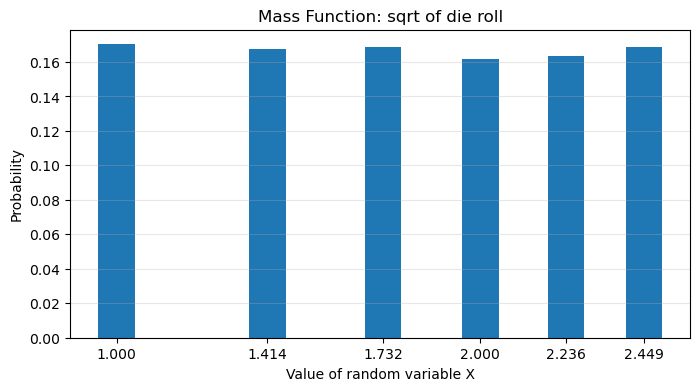

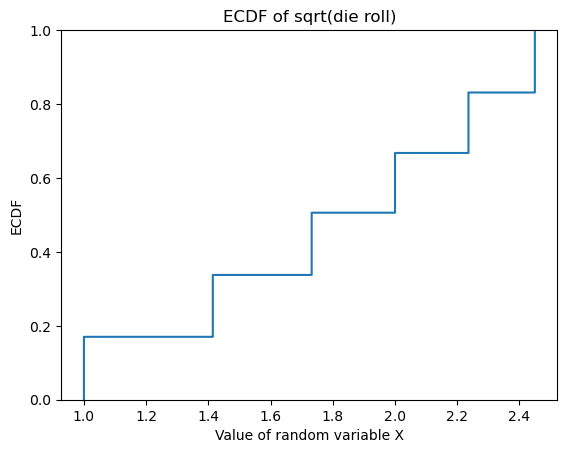

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(seed=42)

n_rolls = 5000
rolls = rng.integers(1, 7, size=n_rolls)

X = np.sqrt(rolls)

values, counts = np.unique(X, return_counts=True)
probs = counts / n_rolls

plt.figure(figsize=(8, 4))
plt.bar(values, probs, width=0.1)
plt.title("Mass Function: sqrt of die roll")
plt.xlabel("Value of random variable X")
plt.ylabel("Probability")
plt.xticks(values)
plt.grid(axis='y', alpha=0.3)
plt.show()

sns.ecdfplot(X)
plt.title("ECDF of sqrt(die roll)")
plt.xlabel("Value of random variable X")
plt.ylabel("ECDF")
plt.show()

Sum of two six-sided dice
Each die has outcomes {1, 2, 3, 4, 5, 6}.
When we add the results, the possible sums are: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
Number of outcomes: 36 (6 × 6)
Number of distinct sums: 11
Probabilities for each sum:

2: 1/36
3: 2/36
4: 3/36
5: 4/36
6: 5/36
7: 6/36
8: 5/36
9: 4/36
10: 3/36
11: 2/36
12: 1/36
Event space: power set of {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, which has 2^11 = 2048 events.

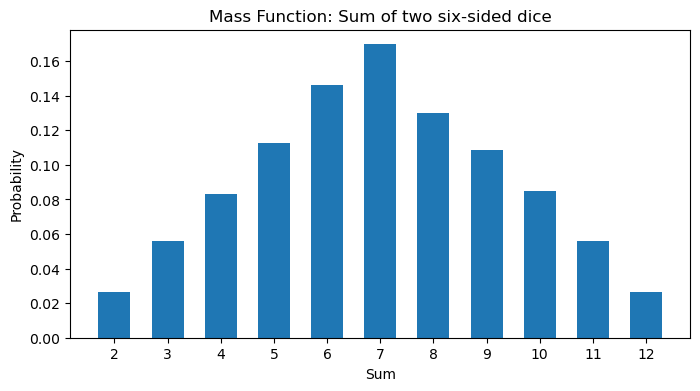

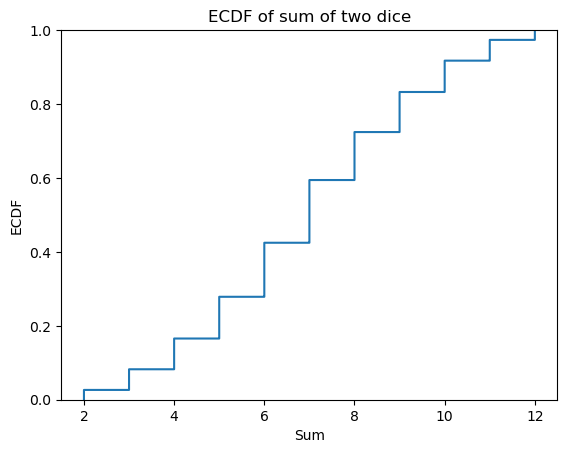

In [3]:
n_rolls = 10000
die1 = rng.integers(1, 7, size=n_rolls)
die2 = rng.integers(1, 7, size=n_rolls)
sums = die1 + die2

values, counts = np.unique(sums, return_counts=True)
probs = counts / n_rolls

plt.figure(figsize=(8, 4))
plt.bar(values, probs, width=0.6)
plt.title("Mass Function: Sum of two six-sided dice")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.xticks(values)
plt.show()

sns.ecdfplot(sums)
plt.title("ECDF of sum of two dice")
plt.xlabel("Sum")
plt.ylabel("ECDF")
plt.show()

### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

Wheel: 37 outcomes → {0 (green), 1..36}.
Colors: red = {1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36};
black = {2,4,6,8,10,11,13,15,17,20,22,24,26,28,29,31,33,35}; 0 is green.

Probability space:

Outcomes: 37 equally likely numbers.
Probability of each number: 1/37.
Events: any subset of the 37 outcomes (there are 2^37 events).
Betting rule for a $1 bet:

If your bet covers K slots and wins, the net payoff is 36/K − 1.
Otherwise you lose 1.
Examples:

Even-money (red/black, odd/even): K = 18 → net win = 1.
Single number: K = 1 → net win = 35.
Split {a,b}: K = 2 → net win = 17.
Street (3 numbers): K = 3 → net win = 11.
Square (4 numbers): K = 4 → net win = 8.
Line (6 numbers): K = 6 → net win = 5.
Dozen (12 numbers): K = 12 → net win = 2.

In [19]:
import random
import numpy as np
import pandas as pd

RED = {1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36}
BLACK = {2,4,6,8,10,11,13,15,17,20,22,24,26,28,29,31,33,35}

def bet_set(kind, value=None):
    if kind == 'single':
        return {int(value)}
    if kind == 'red':
        return set(RED)
    if kind == 'black':
        return set(BLACK)
    if kind == 'odd':
        return {n for n in range(1, 37) if n % 2 == 1}
    if kind == 'even':
        return {n for n in range(1, 37) if n % 2 == 0}
    if kind == 'split':
        return {int(value[0]), int(value[1])}
    if kind == 'line':
        return set(map(int, value))
    raise ValueError("Unknown bet type")

def net_payoff(outcome_number, bet_numbers):
    K = len(bet_numbers)
    if outcome_number in bet_numbers:
        return 36.0/K - 1.0 
    return -1.0

def simulate(bet_numbers, n=1000):
    outcomes = np.random.randint(0, 37, size=n)
    pays = np.array([net_payoff(o, bet_numbers) for o in outcomes], dtype=float)
    return pays

bets = {
    "Red": bet_set('red'),
    "Odd": bet_set('odd'),
    "Single (7)": bet_set('single', 7),
    "Split (1,2)": bet_set('split', (1,2)),
    "Line (1-6)": bet_set('line', (1,2,3,4,5,6))
}

results = []
for name, numbers in bets.items():
    pays = simulate(numbers, n=1000)
    K = len(numbers)
    theoretical_ev = -1/37
    results.append({
        "Bet": name,
        "K": K,
        "Avg Payoff ($)": pays.mean(),
        "Theoretical EV ($)": theoretical_ev
    })

df = pd.DataFrame(results)
print(df)


           Bet   K  Avg Payoff ($)  Theoretical EV ($)
0          Red  18          -0.040           -0.027027
1          Odd  18          -0.030           -0.027027
2   Single (7)   1           0.260           -0.027027
3  Split (1,2)   2           0.260           -0.027027
4   Line (1-6)   6           0.032           -0.027027


- Probability Space of the Roulette Wheel

The roulette wheel has 37 possible outcomes, numbered from 0 to 36.

The number 0 is green.

Numbers 1–36 are either red or black, with 18 numbers in each color.

An outcome is any single number that comes up when the wheel is spun.
An event is any subset of outcomes. For example:

The event "Red" includes all 18 red numbers.

The event "Odd" includes all odd numbers from 1 to 36.

The event "Single 7" is just {7}.

The event "Split 1,2" is {1,2}.

The event "Line 1–6" is {1,2,3,4,5,6}.

Since there are 37 possible outcomes, there are 
2^37=137,438,953,472 possible events (all possible subsets of outcomes).
The probability of each individual outcome is equal, 

P(number)=1/37≈0.027.
The probability of an event is the sum of probabilities of its outcomes.

- Function to Compute Bet Result


The number that came up in a spin.

The numbers included in the player’s bet.

The function calculates:

If the spin result is in the bet numbers: the player wins and receives a payoff of 36/K−1, where K is the number of slots in the bet.

If the spin result is not in the bet numbers: the player loses $1, giving a payoff of -1.

This correctly models both basic and complex bets.

- Simulations of Bets

simulated 1000 spins for each of these bets:

Red (all red numbers, K=18)

Odd (all odd numbers, K=18)

Single 7 (K=1)

Split 1,2 (K=2)

Line 1–6 (K=6)

For each spin, the payoff is computed using the function above.

- Average Payoffs and Expected Values

From your simulation output:

Bet	        K	    Avg Payoff ($)	    Theoretical EV ($)

Red	        18	    -0.040	            -0.027

Odd	        18	    -0.030	            -0.027

Single (7)	 1	    0.260	            -0.027

Split (1,2)	 2	    0.260	            -0.027

Line (1-6)	 6	    0.032	            -0.027


The simulated average payoffs are close to the theoretical expected value of -1/37 ≈ -0.027, which represents the house edge.

Smaller bets (like single numbers or splits) have higher volatility: sometimes you win big, sometimes you lose.

Larger bets (like Red, Odd, or Line) have smaller fluctuations, but still a slightly negative expected value.

No bet gives a positive expected value in the long run; the casino always has an edge.

### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


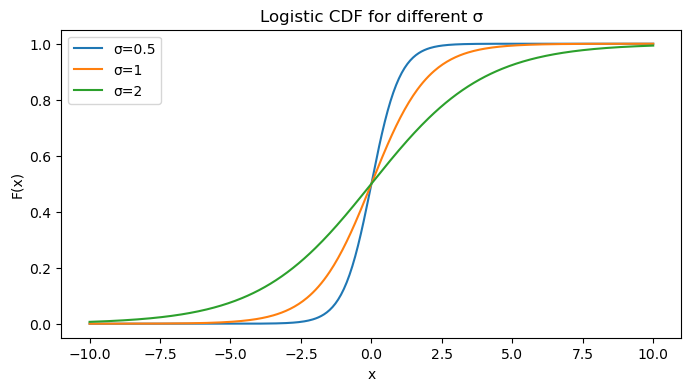

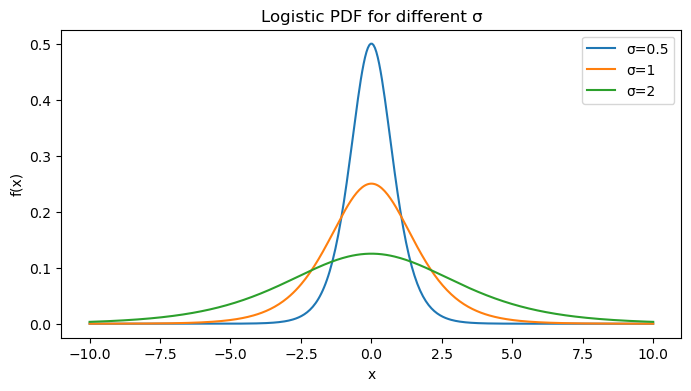

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

sigmas = [0.5, 1, 2]
x = np.linspace(-10, 10, 400)

plt.figure(figsize=(8,4))
for s in sigmas:
    plt.plot(x, logistic.cdf(x, scale=s), label=f"σ={s}")
plt.title("Logistic CDF for different σ")
plt.xlabel("x"); plt.ylabel("F(x)")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
for s in sigmas:
    plt.plot(x, logistic.pdf(x, scale=s), label=f"σ={s}")
plt.title("Logistic PDF for different σ")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend()
plt.show()

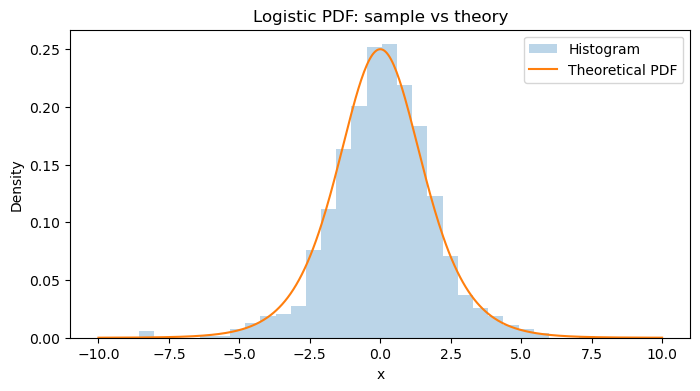

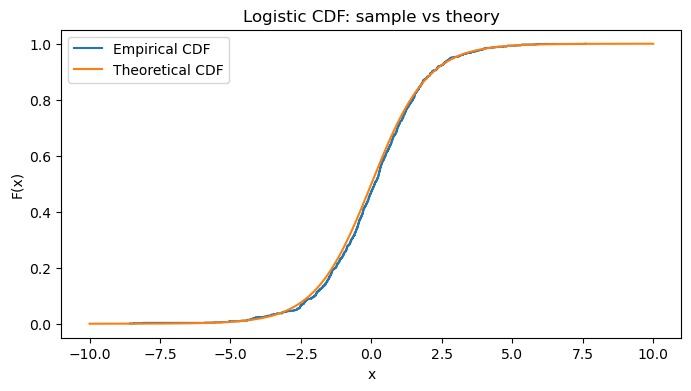

In [7]:
n = 1000
rng = np.random.default_rng(0)
samples_logistic = logistic.rvs(scale=1, size=n, random_state=rng)

plt.figure(figsize=(8,4))
plt.hist(samples_logistic, bins=30, density=True, alpha=0.3, label="Histogram")
plt.plot(x, logistic.pdf(x, scale=1), label="Theoretical PDF")
plt.title("Logistic PDF: sample vs theory")
plt.xlabel("x"); plt.ylabel("Density")
plt.legend()
plt.show()

sorted_x = np.sort(samples_logistic)
ecdf_y = np.arange(1, len(sorted_x)+1) / len(sorted_x)
plt.figure(figsize=(8,4))
plt.step(sorted_x, ecdf_y, where="post", label="Empirical CDF")
plt.plot(x, logistic.cdf(x, scale=1), label="Theoretical CDF")
plt.title("Logistic CDF: sample vs theory")
plt.xlabel("x"); plt.ylabel("F(x)")
plt.legend()
plt.show()

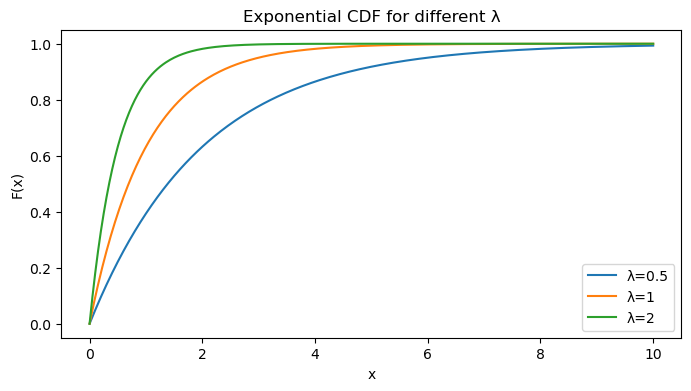

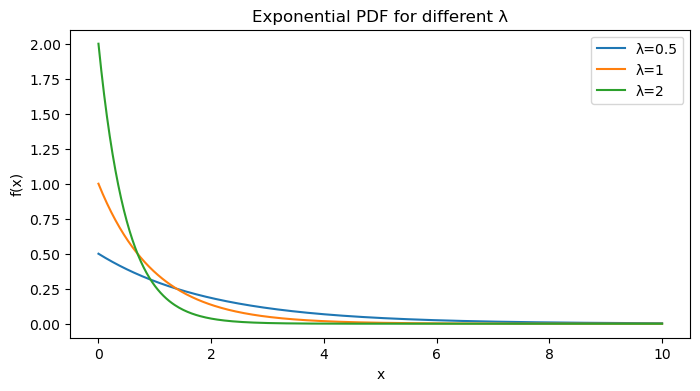

In [8]:
from scipy.stats import expon

lambdas = [0.5, 1, 2]
x_exp = np.linspace(0, 10, 400)

plt.figure(figsize=(8,4))
for lam in lambdas:
    plt.plot(x_exp, expon.cdf(x_exp, scale=1/lam), label=f"λ={lam}")
plt.title("Exponential CDF for different λ")
plt.xlabel("x"); plt.ylabel("F(x)")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
for lam in lambdas:
    plt.plot(x_exp, expon.pdf(x_exp, scale=1/lam), label=f"λ={lam}")
plt.title("Exponential PDF for different λ")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend()
plt.show()

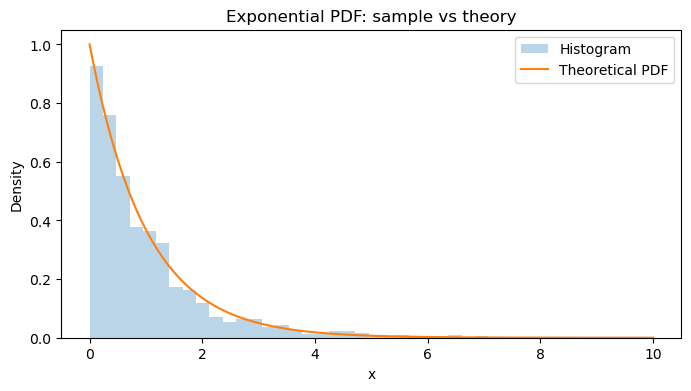

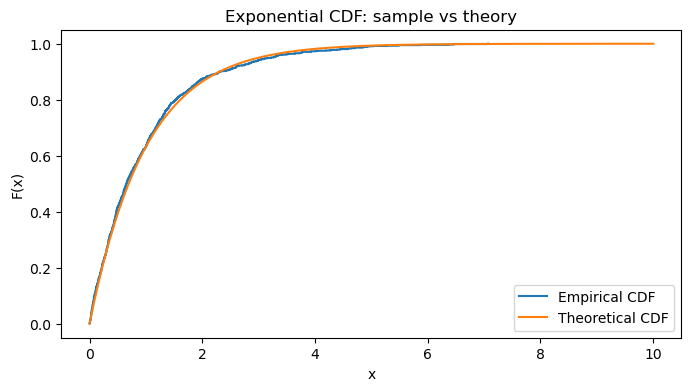

In [9]:
n = 1000
samples_exp = expon.rvs(scale=1/1, size=n, random_state=rng)

plt.figure(figsize=(8,4))
plt.hist(samples_exp, bins=30, density=True, alpha=0.3, label="Histogram")
plt.plot(x_exp, expon.pdf(x_exp, scale=1), label="Theoretical PDF")
plt.title("Exponential PDF: sample vs theory")
plt.xlabel("x"); plt.ylabel("Density")
plt.legend()
plt.show()

sorted_x_exp = np.sort(samples_exp)
ecdf_y_exp = np.arange(1, len(sorted_x_exp)+1) / len(sorted_x_exp)
plt.figure(figsize=(8,4))
plt.step(sorted_x_exp, ecdf_y_exp, where="post", label="Empirical CDF")
plt.plot(x_exp, expon.cdf(x_exp, scale=1), label="Theoretical CDF")
plt.title("Exponential CDF: sample vs theory")
plt.xlabel("x"); plt.ylabel("F(x)")
plt.legend()
plt.show()

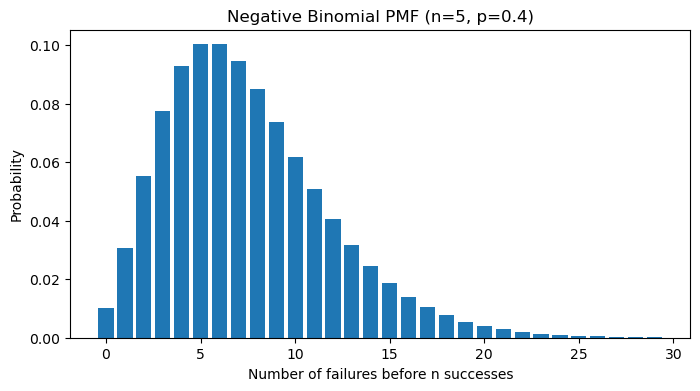

In [20]:
from scipy.stats import nbinom

n, p = 5, 0.4
x_nb = np.arange(0, 30)
pmf_nb = nbinom.pmf(x_nb, n, p)

plt.figure(figsize=(8,4))
plt.bar(x_nb, pmf_nb)
plt.title("Negative Binomial PMF (n=5, p=0.4)")
plt.xlabel("Number of failures before n successes")
plt.ylabel("Probability")
plt.show()

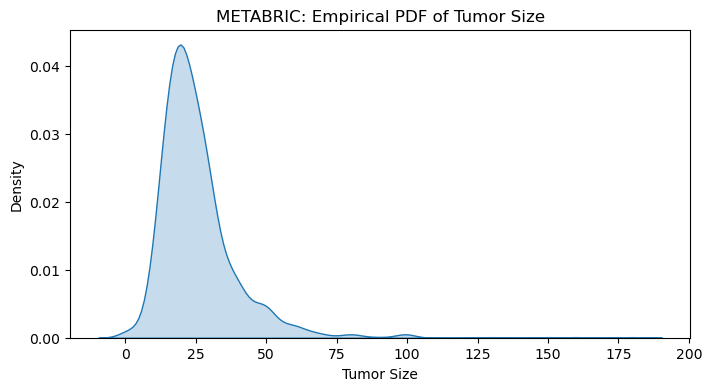

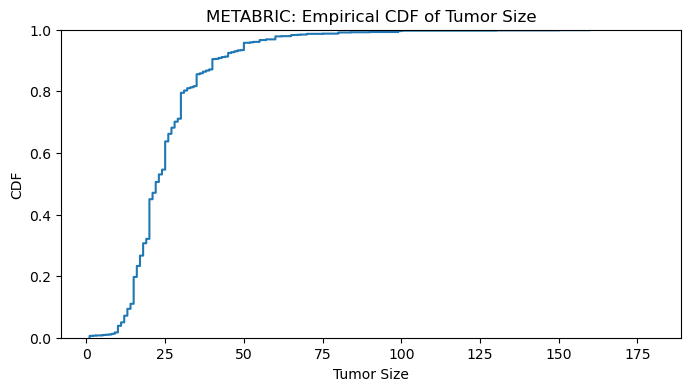

In [10]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("data/metabric.csv")
x_tumor = df["Tumor Size"].dropna()

plt.figure(figsize=(8,4))
sns.kdeplot(x_tumor, fill=True)
plt.title("METABRIC: Empirical PDF of Tumor Size")
plt.xlabel("Tumor Size"); plt.ylabel("Density")
plt.show()

plt.figure(figsize=(8,4))
sns.ecdfplot(x_tumor)
plt.title("METABRIC: Empirical CDF of Tumor Size")
plt.xlabel("Tumor Size"); plt.ylabel("CDF")
plt.show()

Logistic Distribution:
Support: x ∈ ℝ
CDF: F(x) = 1 / (1 + e^{-(x−μ)/σ})
PDF: f(x) = e^{−(x−μ)/σ} / [σ(1 + e^{−(x−μ)/σ})²]

Exponential Distribution:
Support: x ≥ 0
CDF: F(x) = 1 − e^{−λx}
PDF: f(x) = λe^{−λx}

Negative Binomial Distribution:
Support: k = 1,2,3,...
PMF: P(K=k) = (1−p)^{k−1} p
Interpretation: Number of trials until first success

Categorical:
Support: {1,2,...,m}
PMF: P(X=i) = p_i where Σp_i = 1
